<a href="https://colab.research.google.com/github/TerriblePepito/TerriblePepitostest/blob/main/tradestypesdraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import files
import pandas as pd

# Ouvrir la boîte de dialogue pour télécharger le fichier
uploaded = files.upload()

# Lire le fichier CSV téléchargé dans un DataFrame
for filename in uploaded.keys():
    df = pd.read_csv(filename,delimiter=';', on_bad_lines='warn',encoding='latin-1')  # Importer le fichier CSV
    print(df.head())  # Afficher les premières lignes du DataFrame

Saving Trad2509.csv to Trad2509 (3).csv
       Instrument  Volume                 Date    P/P
0  #Nestle_(NESN)    -100  2025-09-02 00:00:00     76
1          EURUSD    3000  2025-09-02 00:00:00     -9
2  #Sanofi_(SASY)    -100  2025-09-04 00:00:00  57,24
3  #Sanofi_(SASY)    -100  2025-09-04 00:00:00   54,4
4  #Sanofi_(SASY)    -100  2025-09-04 00:00:00  48,75


In [40]:
#subgroup of EUR/USD
dfvalue=df.loc[df['Instrument']=='EURUSD',['P/P','Volume']]

In [41]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')

In [42]:
df['P/P'] = df['P/P'].str.replace(',', '.').astype(float)


In [43]:
df['Volume'] = df['Volume'].astype(str).str.replace("'", "").astype(float)

In [44]:
print(df.dtypes)

Instrument            object
Volume               float64
Date          datetime64[ns]
P/P                  float64
dtype: object


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipython-input-2374966470.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Instrument', data=df, palette='pastel')


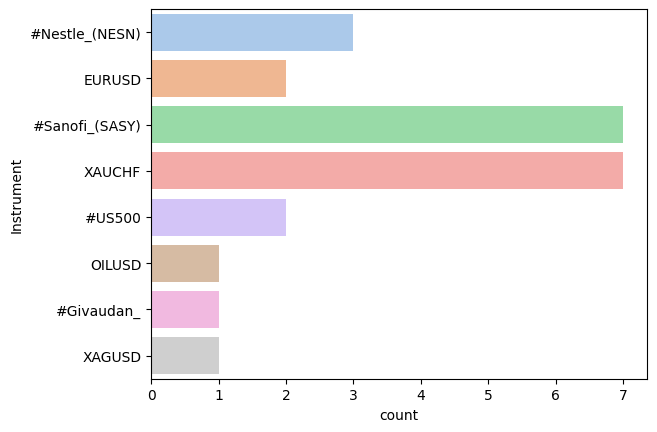

In [46]:
sns.countplot(y='Instrument', data=df, palette='pastel')
plt.show()

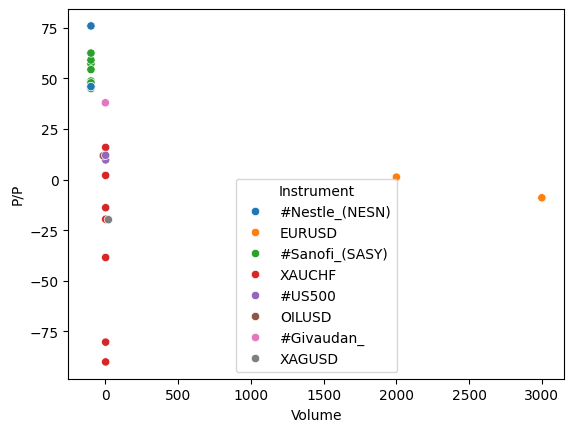

In [47]:
sns.scatterplot(x='Volume', y='P/P', data=df, hue="Instrument")
plt.show()

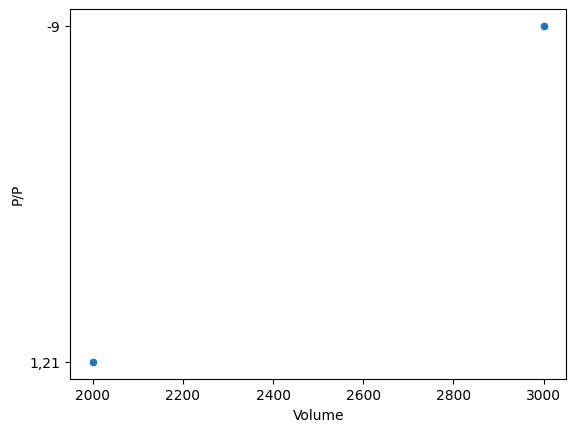

In [48]:
sns.scatterplot(x='Volume', y='P/P', data=dfvalue)
plt.show()

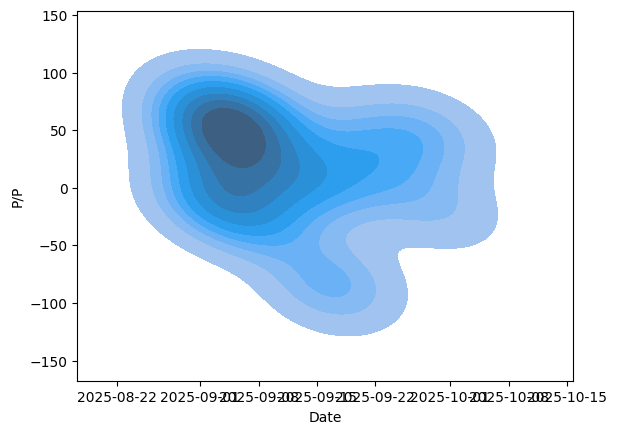

In [49]:
sns.kdeplot(data=df, x="Date", y="P/P", fill=True)
plt.show()

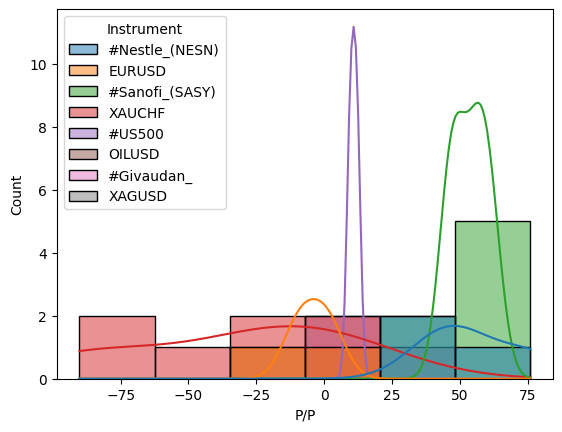

In [50]:
sns.histplot(data=df, x="P/P", kde=True, hue="Instrument")
plt.show()

In [51]:
total_pp_par_instrument = df.groupby('Instrument')['P/P'].sum()
print(total_pp_par_instrument)

Instrument
#Givaudan_         38.00
#Nestle_(NESN)    168.00
#Sanofi_(SASY)    374.97
#US500             21.75
EURUSD             -7.79
OILUSD             11.81
XAGUSD            -19.83
XAUCHF           -224.63
Name: P/P, dtype: float64


/tmp/ipython-input-1884350409.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_pp_par_instrument_sorted.index, y=total_pp_par_instrument_sorted.values, palette='viridis')


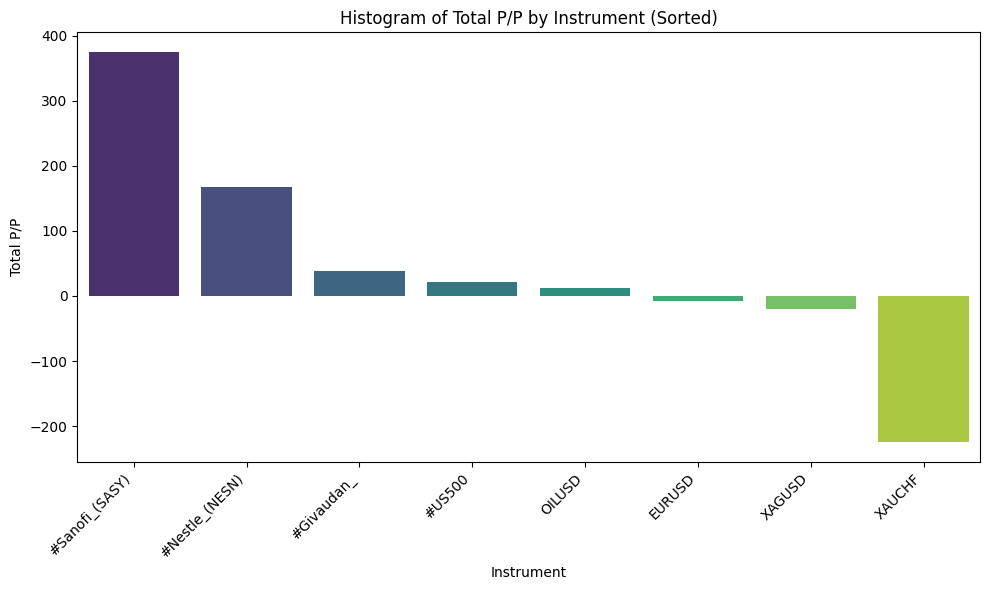

In [52]:
# prompt: peut tu me faire un histogramme des valeurs pp_par_instrument, sorted please

import matplotlib.pyplot as plt
total_pp_par_instrument_sorted = total_pp_par_instrument.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=total_pp_par_instrument_sorted.index, y=total_pp_par_instrument_sorted.values, palette='viridis')
plt.xlabel('Instrument')
plt.ylabel('Total P/P')
plt.title('Histogram of Total P/P by Instrument (Sorted)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()